In [1]:
import scanpy as sc
import torch
from deepmap import DeepMap
import warnings

In [2]:
torch.cuda.set_device(1)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
adata = sc.read_h5ad('../datasets/preprocessed/Spermatogenesis_human_macaque_mouse.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 9329 × 11922
    obs: 'celltype', 'batch'

In [6]:
adata.obs

,celltype,batch
Human1.1_TTTAGTAAGATA_human,RoundSpermatid,human
Human1.1_CCTCGCTACGCC_human,RoundSpermatid,human
Human1.1_TAATGGCTACGA_human,RoundSpermatid,human
Human1.1_ACTGTGATTTTC_human,RoundSpermatid,human
Human1.1_GACCATTGATTC_human,RoundSpermatid,human
...,...,...
Monkey2_TTCAAGGGGATA_macaque,Spermatocyte,macaque
Monkey2_CAAGTAGCGCTG_macaque,Spermatogonia,macaque
Monkey2_CTCACTGGACCC_macaque,Spermatogonia,macaque
Monkey2_TCTCTGTCGATC_macaque,Spermatogonia,macaque


In [7]:
batch_key = 'batch'

model = DeepMap(k = 100, mnn_only = False)
model.preprocess(adata, batch_key, gene_num = 6000)
model.integrate(n_iters = 4000, beta = 0.01)

Thu Jun  8 14:45:30 2023 Data normalization ...
Thu Jun  8 14:45:31 2023 Finding highly variable genes ...
Thu Jun  8 14:45:33 2023 Found 1831 highly variable genes
Thu Jun  8 14:45:33 2023 Saving unscaled data ...
Thu Jun  8 14:45:33 2023 Data Scaling ...
Thu Jun  8 14:45:33 2023 Performing PCA ...
Thu Jun  8 14:45:34 2023 Start integrating ...
Thu Jun  8 14:45:34 2023 GPU used.
Thu Jun  8 14:45:34 2023 Finding neighbors ...
Thu Jun  8 14:45:43 2023 Initial neighbor search completed, time used: 8.5 seconds.
Thu Jun  8 14:47:35 2023 Reconstructing neighbors 1/5 ...
Thu Jun  8 14:48:10 2023 Reconstructing neighbors 2/5 ...
Thu Jun  8 14:48:42 2023 Reconstructing neighbors 3/5 ...
Thu Jun  8 14:49:16 2023 Reconstructing neighbors 4/5 ...
Thu Jun  8 14:49:53 2023 Reconstructing neighbors 5/5 ...
Thu Jun  8 14:50:27 2023 Integration finished.


In [8]:
model.integrated

View of AnnData object with n_obs × n_vars = 9329 × 20
    obs: 'celltype', 'batch'

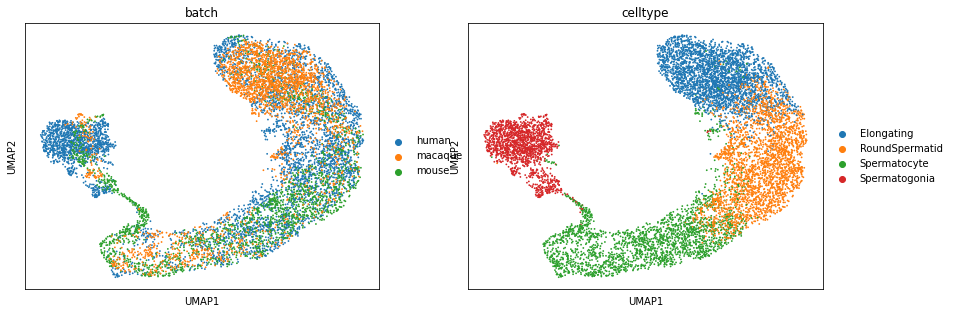

In [9]:
sc.pp.neighbors(model.integrated)
sc.tl.umap(model.integrated)
sc.pl.umap(model.integrated, color = ['batch', 'celltype'])